# analyzing my youtube history

In this notebook I will analyze my youtube data and try to use a machine learning moddle to predict my watching behaviour. To do this, I first downloaded my data from [google takeout](https://takeout.google.com/) and created a dataset. This data I have only stored on my own computer for my privacy, and in this notebook I will only analyze my watching my time, as I do not want to share much more information about myself. However, this analysis is still reproducable if a new watch.history.json file is placed in the folder in which this notebook is stored. 

In this notebook, my aims are: 

- to visualize at which times of the day I watch the most youtube 
- create a moddle that is capable of predicting my watching behaviour 

## set-up:

In [4]:
# updated all packages, however, as this does not need to be done every time the code lines are for now turned into comments: 
# pip install lxml
# pip install pafy
# pip install youtube-dl
# pip install wordcloud

In [5]:
# import all required packages 
from lxml import html
import pafy
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import json

## data importation

I will check what files are all available in the directory, of all downloaded files, right now only the "watch-history.json" file is required, however, in a future analyses for myself I will use the other available files too: 

In [7]:
import os
os.listdir('./')

['.ipynb_checkpoints',
 'analyzing_youtube_data.ipynb',
 'archive_browser.html',
 'aucuastics.csv',
 'Liked videos.csv',
 'metal, rock + aucustic covers mix.csv',
 'music-library-songs.csv',
 'music-uploads',
 'my-comments.html',
 'my-live-chat-messages.html',
 'rap.csv',
 'search-history.html',
 'search-history.json',
 'subscriptions.csv',
 'Uploads from A T.csv',
 'Watch later.csv',
 'watch-history.html',
 'watch-history.json']

In [8]:
# load my watch history data into a dataframe called "data"
with open('watch-history.json', encoding="utf-8") as file:
    data = json.load(file)

In [9]:
# inspecting the data that was loaded in: 
data[:1]

[{'header': 'YouTube',
  'title': 'Watched Html table to Csv',
  'titleUrl': 'https://www.youtube.com/watch?v=BQSSFUJcnM4',
  'subtitles': [{'name': 'Convert File ',
    'url': 'https://www.youtube.com/channel/UCZYeDQVu8Dz_mdvyMotLZbQ'}],
  'time': '2023-05-03T14:21:05.645Z',
  'products': ['YouTube'],
  'activityControls': ['YouTube watch history']}]

In [10]:
len(data)

42200

from the table above it becomes vissible that the data is imported properly, and that the table has 42200 colums of data that can be analyzed.

### making a tidy data set

from the data table above, the column "time" will be analyzed further, however, this data still needs to be converted to a format that is readable for python, to further visualize and analyze the dataset. To do this, the days and time will be added to seperate lists, and a dictonary will be created for duplicates to avoid that data gets lost. 

In [11]:
# make empty lists: 
days = []
time = []

# assing the day and time to the previously made lists: 
for e in data:
    days.append(e['time'][:10])
    time.append(e['time'][11:19])

In [12]:
# check if both the time and day colums are equally long and if the format is proper: 
print(len(days))

print(len(time))

print(days[:4])

print(time[:4])

42200
42200
['2023-05-03', '2023-05-03', '2023-05-03', '2023-05-03']
['14:21:05', '14:20:28', '14:20:07', '12:23:26']


In [13]:
# create empty string: 
template = ''

# create a count for how often each data occured 
date_count = dict()
ctr = 0
for e in days:
    if e != template:
        date_count[e] = dict()
        date_count[e]['count'] = 1
        ctr = 1
        template = e
        
        date_count[e][1] = 0
        date_count[e][2] = 0
        date_count[e][3] = 0
        date_count[e][4] = 0
        date_count[e][5] = 0
        date_count[e][6] = 0
        date_count[e][7] = 0
        date_count[e][8] = 0
        date_count[e][9] = 0
        date_count[e][10] = 0
        date_count[e][11] = 0
        date_count[e][12] = 0
        date_count[e][13] = 0
        date_count[e][14] = 0
        date_count[e][15] = 0
        date_count[e][16] = 0
        date_count[e][17] = 0
        date_count[e][18] = 0
        date_count[e][19] = 0
        date_count[e][20] = 0
        date_count[e][21] = 0
        date_count[e][22] = 0
        date_count[e][23] = 0
        date_count[e][0] = 0
        
    else:
        ctr += 1
        date_count[e]['count'] = ctr

In [14]:
ctr = 0

for e in date_count:
    for e1 in range(0, date_count[e]['count']):
        date_count[e][int(time[ctr][0:2])] += 1
        ctr += 1

In [15]:
keys = list(date_count.keys())

data = []
for e in date_count:
    data.append(date_count[e])
    
data[0]

{'count': 101,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 20,
 8: 76,
 9: 0,
 10: 0,
 11: 1,
 12: 1,
 13: 0,
 14: 3,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 0: 0}

In [16]:
columns = list(data[0].keys())
columns

['count',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0]

## data visualisation 

In the table below, the newly created data frame is shown that will be analyzed. In this data frame, the overal number of rows is far smaller (433) when compared to the original dataset (42200). In this new data frame, each row represents one day, while in the original dataset each row represented one video. This shows that on average, I watch about 97 videos each day. 

In [17]:
df = pd.DataFrame(index = keys, data = data, columns = columns)

df

,count,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,0
2023-05-03,101,0,0,0,0,0,0,20,76,0,...,0,0,0,0,0,0,0,0,0,0
2023-05-02,91,0,0,0,0,1,0,0,0,0,...,7,1,0,0,0,0,30,19,33,0
2023-05-01,44,0,0,0,33,1,0,0,0,0,...,0,6,0,0,0,0,0,0,0,0
2023-04-30,127,0,0,0,0,0,0,0,4,12,...,0,42,3,8,24,0,23,0,0,0
2023-04-29,101,0,0,0,0,42,23,2,0,0,...,0,7,1,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,86,0,0,0,1,2,1,6,0,0,...,3,0,0,0,0,8,11,12,0,0
2022-02-27,50,0,0,0,0,0,0,0,2,0,...,5,10,0,0,1,2,10,12,0,0
2022-02-26,20,0,0,0,6,7,2,0,0,0,...,5,0,0,0,0,0,0,0,0,0
2022-02-25,59,0,0,0,0,0,0,0,0,3,...,0,0,1,5,3,1,7,0,0,0


In [18]:
# insert some clever plots here please 

initally I tried to showcase each hour in a seperate dot plot to roughly scan for patterns in my wathcing behaviour, in this plot it appears to be vissible that I watch most youtube videos between 7am and 9am. Around this time I usually get up and watch youtube-shorts while waking up and getting out of bed, which might explain the big increase in the actual number of videos that I wathced (in some cases 70 videos in one hour, which is equal to 1 video every 50 seconds). However, from these plots interperting patterns is still difficult, especially during the days

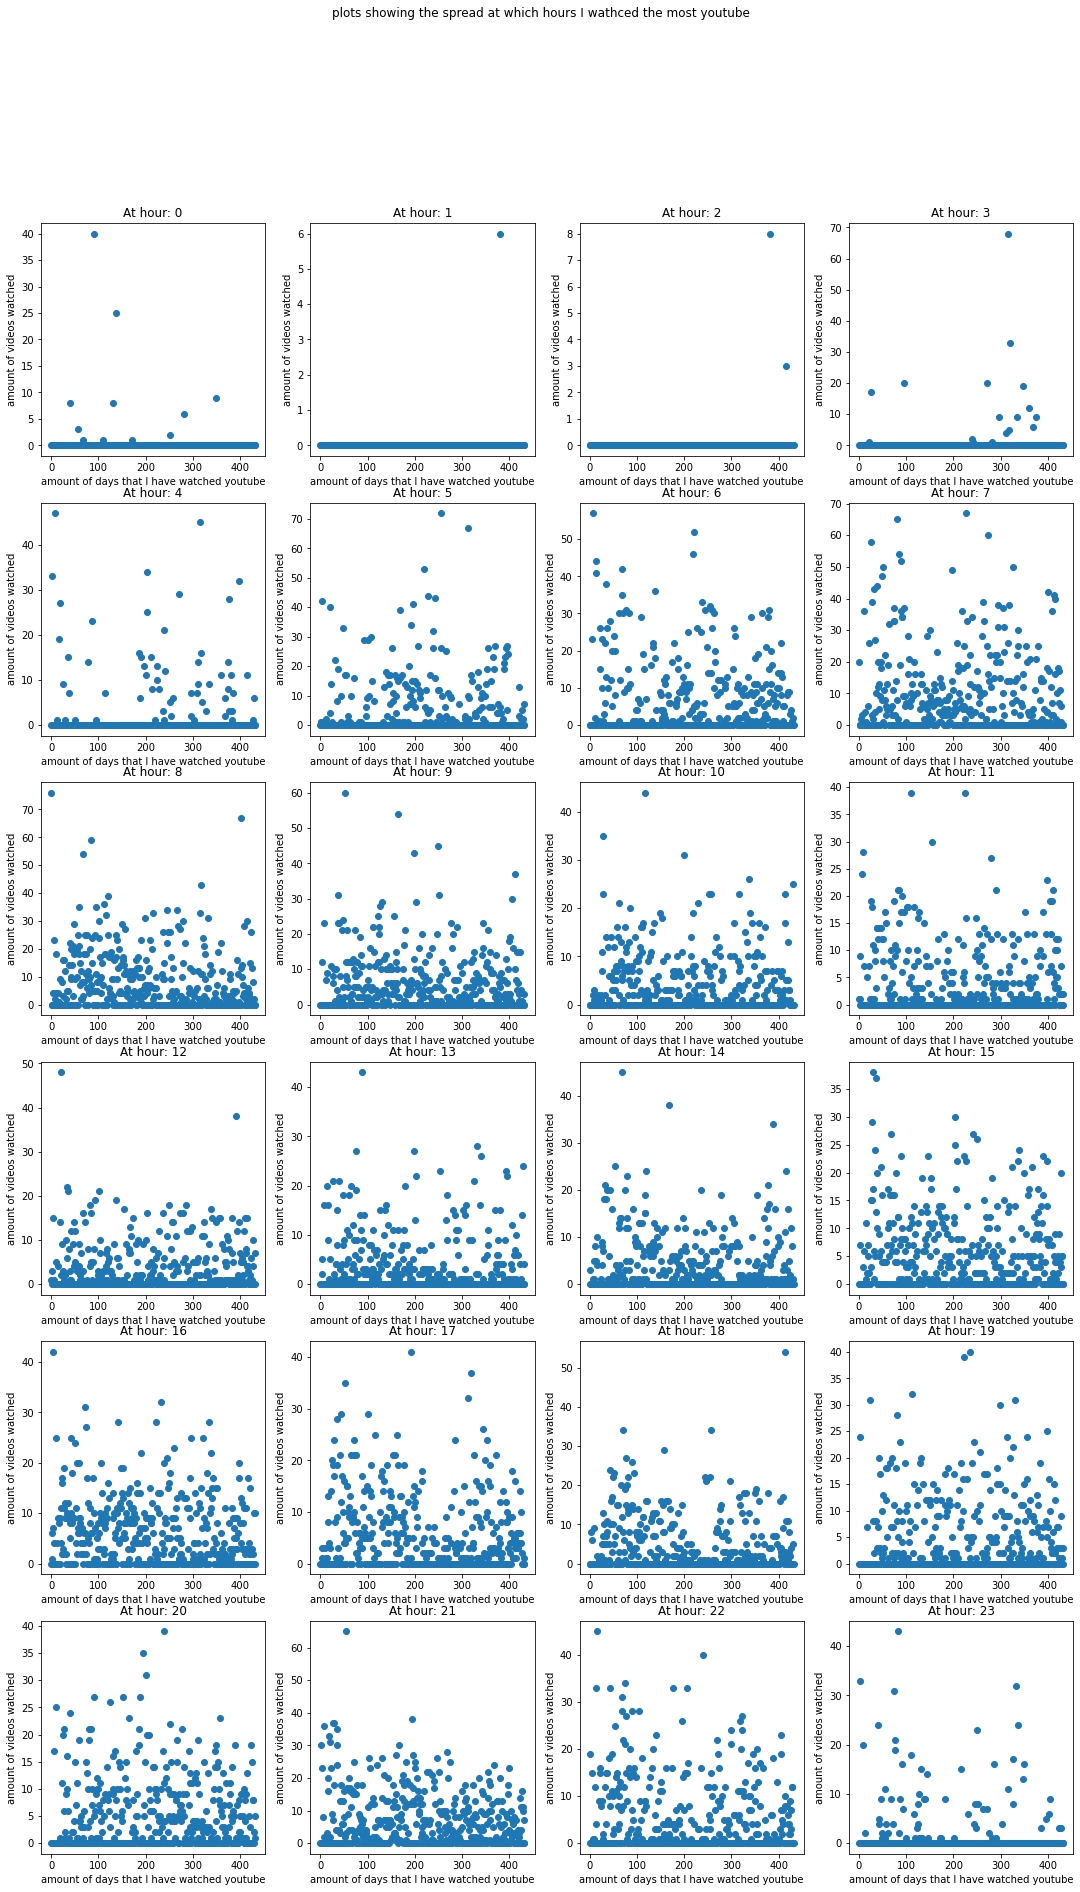

In [19]:
fig, axe = plt.subplots(6,4)
fig.set_size_inches(18.5, 30, forward=True)


axe[0,0].scatter(range(0, len(df)), df[0])
axe[0,0].set_title('At hour: 0')
axe[0,0].set_ylabel('amount of videos watched', fontsize=10)
axe[0,0].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[0,1].scatter(range(0, len(df)), df[1])
axe[0,1].set_title('At hour: 1')
axe[0,1].set_ylabel('amount of videos watched', fontsize=10)
axe[0,1].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[0,2].scatter(range(0, len(df)), df[2])
axe[0,2].set_title('At hour: 2')
axe[0,2].set_ylabel('amount of videos watched', fontsize=10)
axe[0,2].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[0,3].scatter(range(0, len(df)), df[3])
axe[0,3].set_title('At hour: 3')
axe[0,3].set_ylabel('amount of videos watched', fontsize=10)
axe[0,3].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[1,0].scatter(range(0, len(df)), df[4])
axe[1,0].set_title('At hour: 4')
axe[1,0].set_ylabel('amount of videos watched', fontsize=10)
axe[1,0].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[1,1].scatter(range(0, len(df)), df[5])
axe[1,1].set_title('At hour: 5')
axe[1,1].set_ylabel('amount of videos watched', fontsize=10)
axe[1,1].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[1,2].scatter(range(0, len(df)), df[6])
axe[1,2].set_title('At hour: 6')
axe[1,2].set_ylabel('amount of videos watched', fontsize=10)
axe[1,2].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[1,3].scatter(range(0, len(df)), df[7])
axe[1,3].set_title('At hour: 7')
axe[1,3].set_ylabel('amount of videos watched', fontsize=10)
axe[1,3].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[2,0].scatter(range(0, len(df)), df[8])
axe[2,0].set_title('At hour: 8')
axe[2,0].set_ylabel('amount of videos watched', fontsize=10)
axe[2,0].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[2,1].scatter(range(0, len(df)), df[9])
axe[2,1].set_title('At hour: 9')
axe[2,1].set_ylabel('amount of videos watched', fontsize=10)
axe[2,1].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[2,2].scatter(range(0, len(df)), df[10])
axe[2,2].set_title('At hour: 10')
axe[2,2].set_ylabel('amount of videos watched', fontsize=10)
axe[2,2].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[2,3].scatter(range(0, len(df)), df[11])
axe[2,3].set_title('At hour: 11')
axe[2,3].set_ylabel('amount of videos watched', fontsize=10)
axe[2,3].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[3,0].scatter(range(0, len(df)), df[12])
axe[3,0].set_title('At hour: 12')
axe[3,0].set_ylabel('amount of videos watched', fontsize=10)
axe[3,0].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[3,1].scatter(range(0, len(df)), df[13])
axe[3,1].set_title('At hour: 13')
axe[3,1].set_ylabel('amount of videos watched', fontsize=10)
axe[3,1].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[3,2].scatter(range(0, len(df)), df[14])
axe[3,2].set_title('At hour: 14')
axe[3,2].set_ylabel('amount of videos watched', fontsize=10)
axe[3,2].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[3,3].scatter(range(0, len(df)), df[15])
axe[3,3].set_title('At hour: 15')
axe[3,3].set_ylabel('amount of videos watched', fontsize=10)
axe[3,3].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[4,0].scatter(range(0, len(df)), df[16])
axe[4,0].set_title('At hour: 16')
axe[4,0].set_ylabel('amount of videos watched', fontsize=10)
axe[4,0].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[4,1].scatter(range(0, len(df)), df[17])
axe[4,1].set_title('At hour: 17')
axe[4,1].set_ylabel('amount of videos watched', fontsize=10)
axe[4,1].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[4,2].scatter(range(0, len(df)), df[18])
axe[4,2].set_title('At hour: 18')
axe[4,2].set_ylabel('amount of videos watched', fontsize=10)
axe[4,2].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[4,3].scatter(range(0, len(df)), df[19])
axe[4,3].set_title('At hour: 19')
axe[4,3].set_ylabel('amount of videos watched', fontsize=10)
axe[4,3].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[5,0].scatter(range(0, len(df)), df[20])
axe[5,0].set_title('At hour: 20')
axe[5,0].set_ylabel('amount of videos watched', fontsize=10)
axe[5,0].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[5,1].scatter(range(0, len(df)), df[21])
axe[5,1].set_title('At hour: 21')
axe[5,1].set_ylabel('amount of videos watched', fontsize=10)
axe[5,1].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[5,2].scatter(range(0, len(df)), df[22])
axe[5,2].set_title('At hour: 22')
axe[5,2].set_ylabel('amount of videos watched', fontsize=10)
axe[5,2].set_xlabel('amount of days that I have watched youtube', fontsize=10)
axe[5,3].scatter(range(0, len(df)), df[23])
axe[5,3].set_title('At hour: 23')
axe[5,3].set_ylabel('amount of videos watched', fontsize=10)
axe[5,3].set_xlabel('amount of days that I have watched youtube', fontsize=10)
plt.suptitle('plots showing the spread at which hours I wathced the most youtube')
plt.show()

In [20]:
# calculate the average amount of youtube videos I watch in an hour 
average_hour = (sum(df[0])/len(df[0])),(sum(df[1])/len(df[1])),(sum(df[2])/len(df[2])),(sum(df[3])/len(df[3])),(sum(df[4])/len(df[4])),(sum(df[5])/len(df[5])),(sum(df[6])/len(df[6])),(sum(df[7])/len(df[7])),(sum(df[8])/len(df[8])),(sum(df[9])/len(df[9])),(sum(df[10])/len(df[10])),(sum(df[11])/len(df[11])),(sum(df[12])/len(df[12])),(sum(df[13])/len(df[13])),(sum(df[14])/len(df[14])),(sum(df[15])/len(df[15])),(sum(df[16])/len(df[16])),(sum(df[17])/len(df[17])),(sum(df[18])/len(df[18])),(sum(df[19])/len(df[19])),(sum(df[20])/len(df[20])),(sum(df[21])/len(df[21])),(sum(df[22])/len(df[22])),(sum(df[23])/len(df[23]))

# create string with each hour 
hours_day = list(range(0, 24))

stdev = (np.std(df[0])), (np.std(df[1])), (np.std(df[2])), (np.std(df[3])), (np.std(df[4])), (np.std(df[5])), (np.std(df[6])), (np.std(df[7])), (np.std(df[8])), (np.std(df[9])), (np.std(df[10])), (np.std(df[11])), (np.std(df[12])), (np.std(df[13])), (np.std(df[14])), (np.std(df[15])), (np.std(df[16])), (np.std(df[17])), (np.std(df[18])), (np.std(df[19])), (np.std(df[20])), (np.std(df[21])), (np.std(df[22])), (np.std(df[23]))

The graph bellow was created to showcase the average number of youtube videos I watched every hour throughour 2022 and 2023. The x axis shows each hor of the day, while the x axis shows the average amount of videos that I watched. The blue bar showcases the standard deviation. across most day hours, a rather big spread in data is vissible, with relativly high standard deviations. This could point towards an inconsistancy in my own wathcing behaviour. However, it does appear to be vissible that I watch more between: 

- 7am and 8am: around this time I get up and watch youtube shorts 
- between 3pm and 5pm: around this time my concentration has a dip and I tend to start watching youtube 
- around 9pm: again, another time were I usually tend to take a studie break 
- far less activity between 11pm and 4am, during which I often sleep. 

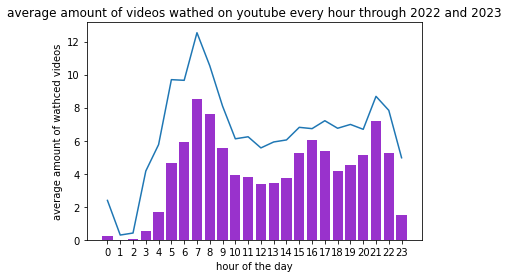

In [21]:
plt.bar(hours_day, average_hour, color = 'darkorchid')
plt.title('average amount of videos wathed on youtube every hour through 2022 and 2023')
plt.xlabel('hour of the day')
plt.xticks(hours_day)
plt.ylabel('average amount of wathced videos')
plt.errorbar(x = hours_day, y = stdev, barsabove=True)
plt.show()

## machine learning

from simple data visualisation with plots and formula's, making predictions about my watch history is still quite difficult. Therefor, I will now use machine learning to see if an algorhithm is capable of achieving this task. 

In [22]:
df_machine = df 
mean = np.mean(df_machine['count'])
df_machine['above_average'] = df_machine['count']>mean

In [23]:
df_machine.drop(columns='count', axis=1, inplace=True)

A new data frame was created, which dropped the count column and added a new column, which calculated if the amount of videos watched on that particular day is above the average amount of videos that I watch every day. This boolean valued column will be used as the Y input for the machine learning algorithm. 

In [24]:
df_machine

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,0,above_average
2023-05-03,0,0,0,0,0,0,20,76,0,0,...,0,0,0,0,0,0,0,0,0,True
2023-05-02,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,30,19,33,0,False
2023-05-01,0,0,0,33,1,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,False
2023-04-30,0,0,0,0,0,0,0,4,12,0,...,42,3,8,24,0,23,0,0,0,True
2023-04-29,0,0,0,0,42,23,2,0,0,0,...,7,1,6,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,0,0,0,1,2,1,6,0,0,0,...,0,0,0,0,8,11,12,0,0,False
2022-02-27,0,0,0,0,0,0,0,2,0,0,...,10,0,0,1,2,10,12,0,0,False
2022-02-26,0,0,0,6,7,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2022-02-25,0,0,0,0,0,0,0,0,3,25,...,0,1,5,3,1,7,0,0,0,False


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
print(df_machine.columns)

Index([              1,               2,               3,               4,
                     5,               6,               7,               8,
                     9,              10,              11,              12,
                    13,              14,              15,              16,
                    17,              18,              19,              20,
                    21,              22,              23,               0,
       'above_average'],
      dtype='object')


In [27]:
X = df_machine.drop(columns='above_average')
y = df_machine['above_average']

In [28]:
# test size of 0,97 was choosen as higher train sizes created in errors becuase the algorithm could not handle that much input. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.97, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()

In [31]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [32]:
predictions = logmodel.predict(X_test)
predictions

array([False,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True, False,
       False, False,

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.75      0.78      0.76       222
        True       0.74      0.70      0.72       199

    accuracy                           0.74       421
   macro avg       0.74      0.74      0.74       421
weighted avg       0.74      0.74      0.74       421



In [35]:
print(confusion_matrix(y_test, predictions))

[[173  49]
 [ 59 140]]


## conclusion

predicting my watching behaviour based on graphs and tables was very difficult for me. However, a few trends became vissible which I could explain and which seemed familiar. Therefor a machine learning algorithm was also used to try to predict my watching behaviour. 

From the data analysis above it becomes vissible that the used machine learning algorhym is able to reachh accuracy scores around 0,75. This is better than 0,5 natural deviation and shows some levels of learning and consistency. However, my watching behaviour appears to be to irregular for the algorhitm to make very accurate predictions. After all humans are very complicated and predicting human behaviour would probably take data from thousands of people, with very complex and heavy algorhitms. nevertheles it is still interesting to see how far we can already push machine learning and use moddles to make predictions. And analyzing my own youtube data made me feel like I made a decent start to this. 